# Autocorrelation and Partial Autocorrelation

(Sourced from: https://www.machinelearningplus.com/time-series/time-series-analysis-python/)

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

## Computation of Autocorrelation

The partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of $Y$. The autoregressive equation of $Y$ is nothing but the linear regression of $Y$ with its own lags as predictors.

For Example, if $Y_{t}$ is the current series and $Y_{t-1}$ is the lag 1 of $Y$, then the partial autocorrelation of lag 3 $Y_{t-3}$ is the coefficient $\alpha_3$ of $Y_{t-3}$ in the following equation:

$Y_{t} = \alpha_{0} + \alpha_{1} Y_{t-1} + \alpha_{2} Y_{t-2} + \alpha_{3} Y_{t-3}$



In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load data
url = "https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"
df = pd.read_csv(url, parse_dates=["date"], index_col="date")
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [3]:
# example (partial) autocorrelations up to 50 lags
acf_50 = acf(df.loc[:, "value"], nlags=50)
pacf_50 = pacf(df.loc[:, "value"], nlags=50)

print(len(acf_50))
print(len(pacf_50))

51
51


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


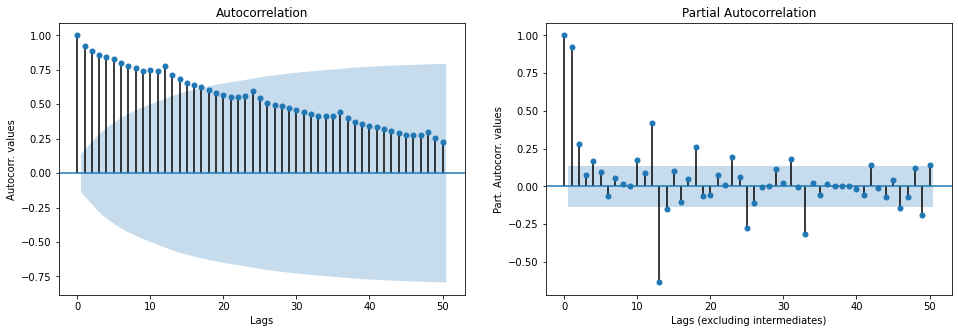

In [4]:
# plot (partial) autocorrelations
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

axes[0].set_title("Autocorrelation")
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Autocorr. values')
plot_acf(df.value.tolist(), lags=50, ax=axes[0])

axes[1].set_title("Partial Autocorrelation")
axes[1].set_xlabel('Lags (excluding intermediates)')
axes[1].set_ylabel('Part. Autocorr. values')
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

plt.show()